In [1]:
import pandas as pd
import numpy as np
import pydataset
import sklearn.preprocessing
import matplotlib.pyplot as plt
import wrangle
import env
import split_scale

In [2]:
df = wrangle.wrangle_telco()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['monthly_charges', 'tenure']]
y = df['total_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=123)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [4]:
X = df[['monthly_charges', 'tenure']]
y = df['total_charges']
X_train, X_test, y_train, y_test = split_scale.split_my_data(X, y, 0.8)

In [ ]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = X_train.copy()

X_test_scaled = X_test.copy()


scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


In [ ]:
scalar, X_train_scaled, X_test_scaled = split_scale.standard_scaler(X_train, X_test)


In [ ]:
scalar

In [ ]:
X_test_scaled

In [ ]:
scalar, train_unscaled, test_unscaled = split_scale.scale_inverse(X_train_scaled, X_test_scaled)

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
train_unscaled = pd.DataFrame(scaler.inverse_transform(X_train_scaled), columns=X_train_scaled.columns.values).set_index([X_train.index.values])

In [ ]:
test_unscaled

In [ ]:
scalar

In [ ]:
scaler = sklearn.preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='uniform', random_state=123, copy=True).fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])




In [ ]:
X_train_scaled

In [ ]:
scalar, X_train_scaled, X_test_scaled = split_scale.uniform_scaler(X_train, X_test)

In [ ]:
X_train_scaled

In [ ]:
scalar, X_train_scaled, X_test_scaled = split_scale.gaussian_scaler(X_train, X_test)

In [ ]:
X_train_scaled.hist()

In [ ]:
scalar, X_train_scaled, X_test_scaled = split_scale.min_max_scaler(X_train, X_test)

In [ ]:
X_train_scaled.hist()

In [5]:
scalar, X_train_scaled, X_test_scaled = split_scale.iqr_robust_scaler(X_train, X_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e36a990>,
      dtype=object)

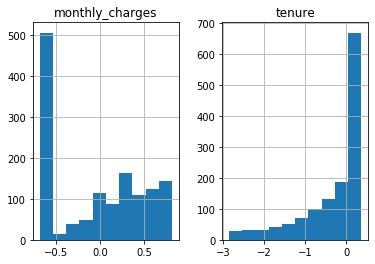

In [6]:
X_train_scaled.hist()